In [87]:
# importing necessary libraries for analysis
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [2]:
# loading the csv file into a dataframe
df2 = pd.read_csv("test/2022_02_08-02_30_31_AM.csv")

In [3]:
# df2 = df1[:100000]

In [4]:
df2

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


## products without prices

In [5]:
# finding the rows where the price_string columns is null or NaN
df2[df2["price_string"].isnull()]

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
13729992,8d763911-79b7-402d-8964-6bfe89692c66,NaN,NaN,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,U2hpcnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729993,2dc182aa-d591-49e4-85d1-5c4a60a09664,NaN,NaN,U3BpY2Vz,UGVwcGVy,Z3JvY2VyaWVz
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz


In [6]:
# getting the uuid of products which have no price and storing it into a variable
df3 = df2[df2["price_string"].isnull()]["uuid"]
df3

0           638744a4-b0ae-4166-8cb6-5c063c862036
1           ab313969-02cc-48b2-9daf-0054efb70b92
5           389d9f75-cc3f-4bd2-94f7-93e381a3bed5
13          1f2766ec-0a27-43f8-b28b-77a44492ead1
16          7bad39f5-74b9-4611-afb9-46fb135190cd
                            ...                 
13729992    8d763911-79b7-402d-8964-6bfe89692c66
13729993    2dc182aa-d591-49e4-85d1-5c4a60a09664
13729995    2a13338e-9268-4f7b-9e7c-b8c41c72971b
13729997    679f073a-862a-4e43-b5ce-41e45afd3bfa
13729998    25677eee-c26b-4abf-bd10-ca77a800ba26
Name: uuid, Length: 8220000, dtype: object

In [7]:
# since there are duplicated uuid's, I'll get the number of unique products which do not have any price
df3.nunique()

822

In [8]:
# since there are duplicated uuid's, I'll get the unique product id's which do not have any price
df3.drop_duplicates().to_frame().reset_index()

,index,uuid
0,0,638744a4-b0ae-4166-8cb6-5c063c862036
1,1,ab313969-02cc-48b2-9daf-0054efb70b92
2,5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5
3,13,1f2766ec-0a27-43f8-b28b-77a44492ead1
4,16,7bad39f5-74b9-4611-afb9-46fb135190cd
...,...,...
817,7024,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d
818,7131,0c4f4319-4a18-4edc-a40d-133b3f4cef5c
819,7456,2d4deea7-b7c2-4342-8488-337c5eacaa84
820,8788,62785956-705e-47db-bd0e-764575333724


These are unique `products` that do not have any price value

## Count of products without prices and with prices in each Product Type, Category, Level 1

In [9]:
# creating a dataframe by grouping the rows to category column
np_category = (
    df2["price_string"]
    .isnull()
    .groupby(df2["category"])
    .sum()
    .astype(int)
    .reset_index(name="np_count")
)
# np_count~count of no price rows
np_category

,category,np_count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,2050000
1,QXJ0IHN1cHBsaWVz,130000
2,QmFieWNhcmU,570000
3,RWxlY3Ryb25pY3M,210000
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,870000
5,SGVhbHRo,700000
6,VG95cyBhbmQgR2FtZXM,600000
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,320000
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,720000
9,Z3JvY2VyaWVz,1130000


In [10]:
p_category = (
    df2["price_string"]
    .notnull()
    .groupby(df2["category"])
    .sum()
    .astype(int)
    .reset_index(name="p_count")
)
p_category

,category,p_count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,1860000
1,QXJ0IHN1cHBsaWVz,190000
2,QmFieWNhcmU,90000
3,RWxlY3Ryb25pY3M,110000
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,700000
5,SGVhbHRo,290000
6,VG95cyBhbmQgR2FtZXM,190000
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,200000
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,750000
9,Z3JvY2VyaWVz,480000


In [11]:
# merging the two datasets
total_category = np_category.merge(p_category)
total_category

,category,np_count,p_count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,2050000,1860000
1,QXJ0IHN1cHBsaWVz,130000,190000
2,QmFieWNhcmU,570000,90000
3,RWxlY3Ryb25pY3M,210000,110000
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,870000,700000
5,SGVhbHRo,700000,290000
6,VG95cyBhbmQgR2FtZXM,600000,190000
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,320000,200000
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,720000,750000
9,Z3JvY2VyaWVz,1130000,480000


Text(0, 0.5, 'Category')

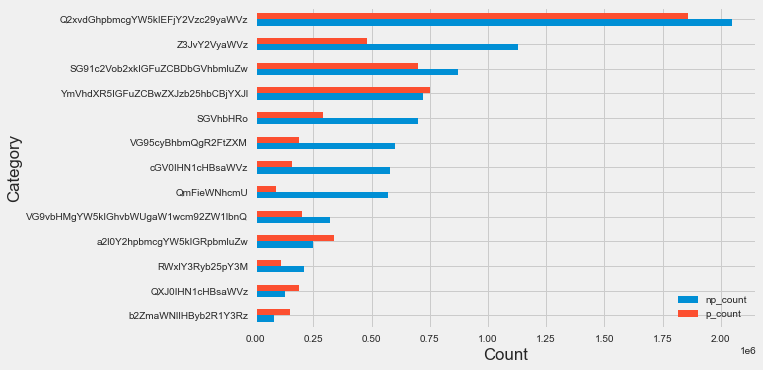

In [100]:
# plotting the count for each category and comparing where price is present and not present
total_category.sort_values(by="np_count").plot.barh(x="category")
plt.xlabel("Count")
plt.ylabel("Category")

`insight--` 
1. most number of products are in `Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz` category and least number of products are in `cGV0IHN1cHBsaWVz` category
2. most products in each category do not have price on them

In [13]:
# creating a dataframe by grouping the rows to product column
np_product_type = (
    df2["price_string"]
    .isnull()
    .groupby(df2["product_type"])
    .sum()
    .astype(int)
    .reset_index(name="np_count")
)
# np_count~count of no price rows
np_product_type

,product_type,np_count
0,Q0FUIExJVFRFUg,30000
1,Q29mZmVlIEJlYW5z,50000
2,Q29mZmVlIEZpbHRlcnM,10000
3,Q29uZGl0aW9uZXIgSGFpcg,20000
4,Q29va2llcw,30000
...,...,...
316,cGV0IEJsYW5rZXQ,10000
317,cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I,10000
318,d29tZW5zIE91dGVyd2Vhcg,20000
319,d29tZW5zIFdhbGxldA,10000


In [14]:
# creating a dataframe by grouping the rows to product column
p_product_type = (
    df2["price_string"]
    .notnull()
    .groupby(df2["product_type"])
    .sum()
    .astype(int)
    .reset_index(name="p_count")
)
p_product_type

,product_type,p_count
0,Q0FUIExJVFRFUg,0
1,Q29mZmVlIEJlYW5z,30000
2,Q29mZmVlIEZpbHRlcnM,0
3,Q29uZGl0aW9uZXIgSGFpcg,10000
4,Q29va2llcw,0
...,...,...
316,cGV0IEJsYW5rZXQ,10000
317,cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I,0
318,d29tZW5zIE91dGVyd2Vhcg,130000
319,d29tZW5zIFdhbGxldA,20000


In [15]:
# merging the two datasets
total_product_type = np_product_type.merge(p_product_type)
total_product_type

,product_type,np_count,p_count
0,Q0FUIExJVFRFUg,30000,0
1,Q29mZmVlIEJlYW5z,50000,30000
2,Q29mZmVlIEZpbHRlcnM,10000,0
3,Q29uZGl0aW9uZXIgSGFpcg,20000,10000
4,Q29va2llcw,30000,0
...,...,...,...
316,cGV0IEJsYW5rZXQ,10000,10000
317,cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I,10000,0
318,d29tZW5zIE91dGVyd2Vhcg,20000,130000
319,d29tZW5zIFdhbGxldA,10000,20000


Since there are so many product types. It's no viable to plot this on a bar graph.

In [16]:
# creating a dataframe by grouping the rows to product column
np_level_1 = (
    df2["price_string"]
    .isnull()
    .groupby(df2["level_1"])
    .sum()
    .astype(int)
    .reset_index(name="np_count")
)
# np_count~count of no price rows
np_level_1

,level_1,np_count
0,MTAgQ3Vw,0
1,MjAgQ3Vw,0
2,MjAgUGludHM,20000
3,MzAgQ3Vw,0
4,MzAtIDM1IFBpbnRz,10000
...,...,...
590,d29tZW5zIGJvb3Rz,20000
591,d29tZW5zIGhlZWxz,0
592,eW9nYSBCbG9ja3M,10000
593,eW9nYSBib2xzdGVycw,10000


In [17]:
# creating a dataframe by grouping the rows to product column
p_level_1 = (
    df2["price_string"]
    .notnull()
    .groupby(df2["level_1"])
    .sum()
    .astype(int)
    .reset_index(name="p_count")
)
p_level_1

,level_1,p_count
0,MTAgQ3Vw,10000
1,MjAgQ3Vw,10000
2,MjAgUGludHM,10000
3,MzAgQ3Vw,10000
4,MzAtIDM1IFBpbnRz,10000
...,...,...
590,d29tZW5zIGJvb3Rz,20000
591,d29tZW5zIGhlZWxz,10000
592,eW9nYSBCbG9ja3M,20000
593,eW9nYSBib2xzdGVycw,10000


In [18]:
# merging the two datasets
total_level_1 = np_level_1.merge(p_level_1)
total_level_1

,level_1,np_count,p_count
0,MTAgQ3Vw,0,10000
1,MjAgQ3Vw,0,10000
2,MjAgUGludHM,20000,10000
3,MzAgQ3Vw,0,10000
4,MzAtIDM1IFBpbnRz,10000,10000
...,...,...,...
590,d29tZW5zIGJvb3Rz,20000,20000
591,d29tZW5zIGhlZWxz,0,10000
592,eW9nYSBCbG9ja3M,10000,20000
593,eW9nYSBib2xzdGVycw,10000,10000


## Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns


In [19]:
df2

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


In [20]:
# function to extract values from price column
def clean_currency(x):
    """If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return x.replace("$", "").replace(",", "")
    return x

In [21]:
# creating a value column which stores the numeric value of currency
df2["value"] = df2["price_string"].apply(clean_currency).astype("float")
df2["value"].fillna(0, inplace=True)

In [22]:
# using locale library to add currency sign before values
import locale

locale.setlocale(locale.LC_ALL, "English_United States.1252")
# Made an assumption with that locale. Adjust as appropriate.
locale._override_localeconv = {"n_sign_posn": 1}

# adding new price column
df2["new_price_string"] = df2["value"].map(locale.currency)

In [26]:
# function to extract currency symbol
def get_symbol(price):
    return re.sub(r"\d+(?:,\d+)*(?:\.\d+)?|\s+", "", price)

In [27]:
# getting the currency symbol from new_price_string
df2["currency"] = df2["new_price_string"].apply(get_symbol)

In [28]:
# rearranging the columns
df2 = df2[
    [
        "uuid",
        "price_string",
        "new_price_string",
        "value",
        "currency",
        "price_string_unf",
        "product_type",
        "level_1",
        "category",
    ]
]
df2

,uuid,price_string,new_price_string,value,currency,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,$0.00,0.00,$,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,$0.00,0.00,$,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,$19.95,19.95,$,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,$92.00,92.00,$,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,$11.50,11.50,$,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,$0.00,0.00,$,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,$69.99,69.99,$,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,$0.00,0.00,$,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,$0.00,0.00,$,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


## List out the categories with average price of product.

In [117]:
# calculating the mean price for all category and storing it into a dataframe
mean_price_category = df2.groupby("category")[["value"]].mean().reset_index()
mean_price_category

,category,value
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,59.659795
1,QXJ0IHN1cHBsaWVz,11.560937
2,QmFieWNhcmU,22.321212
3,RWxlY3Ryb25pY3M,20.713750
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,33.974076
5,SGVhbHRo,9.537071
6,VG95cyBhbmQgR2FtZXM,7.804177
7,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,31.624423
8,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,17.727075
9,Z3JvY2VyaWVz,3.142857


Text(0, 0.5, 'Category')

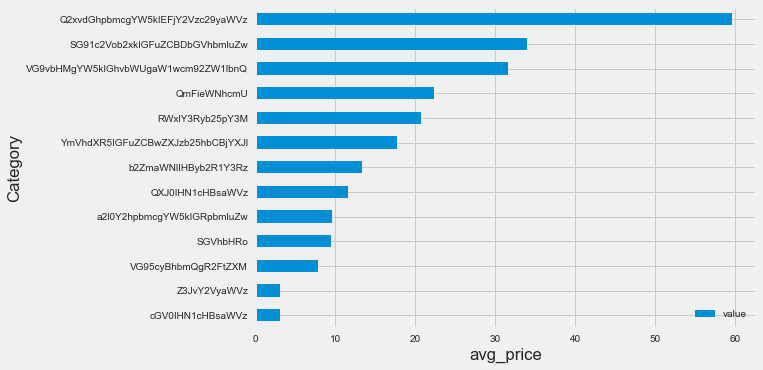

In [95]:
# plotting for each category and comparing average prices
mean_price_category.sort_values(by="value").plot.barh(x="category")
plt.xlabel("avg_price")
plt.ylabel("Category")

`insight--` 
1. average product price for `Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz` category is highest and average product price for `cGV0IHN1cHBsaWVz`category is lowest

### Dependency list

In [79]:
print(
    "\n".join(
        f"{m.__name__}=={m.__version__}"
        for m in globals().values()
        if getattr(m, "__version__", None)
    )
)

json==2.0.9
seaborn==0.11.2
numpy==1.19.5
pandas==1.3.5
re==2.2.1
sklearn==0.23.2
